#### Importing Libraries

In [1]:
# Import all the necessaries libraries and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

#### Dataset Importing and Data Manipulation 

In [2]:
# Import Dataset
video_games_data = pd.read_csv("games.csv", encoding = 'latin1')

# Drop any NAN value in the dataset
video_games_data = video_games_data.dropna()

# Drop "Unnamed:0" Columns since it's not useful for the predicitons
video_games_data = video_games_data.drop(['Unnamed: 0'], axis=1)

In [3]:
# Print a random sampple of 10 items
video_games_data.sample(4)

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
174,Danganronpa 2: Goodbye Despair,"Jul 26, 2012","['NIS America', 'Spike ChunSoft']",3.9,972,972,"['Adventure', 'Point-and-Click', 'Visual Novel']",The follow up to Danganronpa: Trigger Happy Ha...,['danganronpa por mais bizzaro q seja nunca de...,9.9K,288,1.8K,605
349,Grand Theft Auto V,"Sep 17, 2013","['Rockstar North', 'Rockstar Games']",3.8,2.1K,2.1K,"['Adventure', 'Shooter']",Grand Theft Auto V is a vast open world game s...,['People be rating this a 3.... BITCH BE SERIO...,30K,829,3.2K,664
526,Norco,"Mar 24, 2022","['Geography of Robots', 'Raw Fury']",3.9,386,386,"['Adventure', 'Indie', 'Point-and-Click', 'Puz...",Norco is a Southern Gothic point & click narra...,"['fuck prose, all my homies hate flowery, bori...",809,88,651,561
987,Chained Echoes,"Dec 08, 2022","['Deck13 Spotlight', 'Ark Heiral']",4.2,191,191,"['Adventure', 'Indie', 'RPG', 'Strategy', 'Tur...","Take up your sword, channel your magic or boar...","['Chained Echoes : Impressive yet flawed', 'An...",445,228,584,598


In [4]:
# Convert 1k to float 1000
def convert_to_thousands(value):
    if 'K' in value:
        return float(value.replace('K', '')) * 1000
    else:
        return float(value)
    
# Columns which have to be converted using previous function
columns = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

# Converting values to thousands  and deleting K
video_games_data[columns] = video_games_data[columns].applymap(convert_to_thousands)

### Q1 - Can we predict the Rating of a game based on its features?

In [5]:
# Define features and target variable
X = video_games_data[['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']]
y = video_games_data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical Categoroes
numeric_features = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']

# Define a numeric transformer using StandardScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Define the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [6]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {round(mse* 100,2)}%')
print(f'Train Accuracy {round(model.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(model.score(X_test, y_test)* 100,2)}%')

Mean Squared Error: 12.18%
Train Accuracy 93.22%
Test Accuracy 55.74%


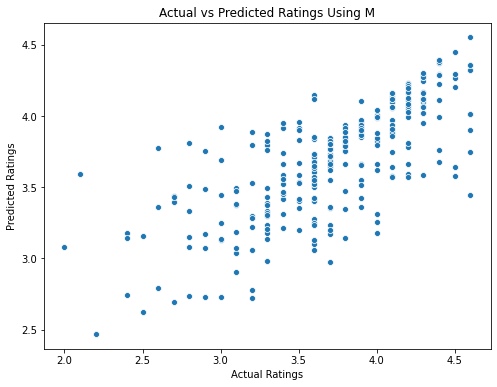

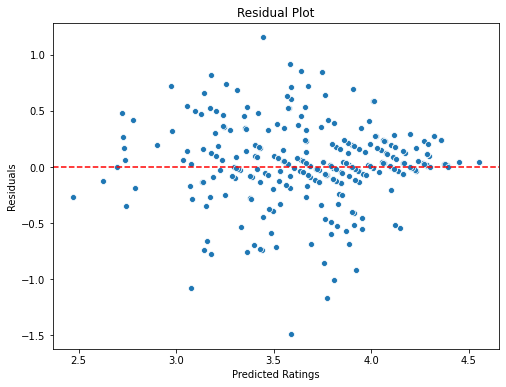

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Ratings Using M')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Visualization: Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

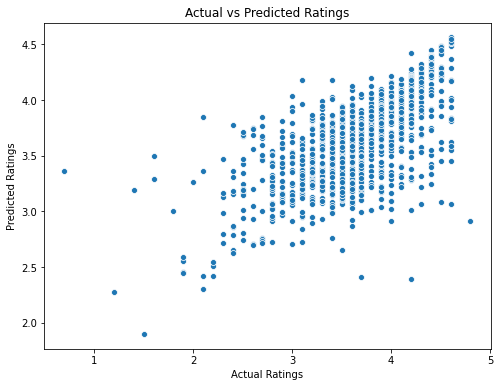

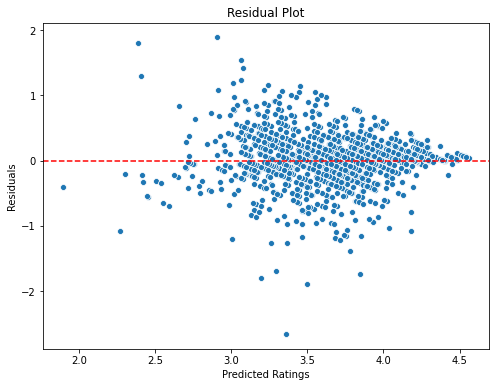

In [8]:
# Make predictions using the entire dataset
y_pred_all = cross_val_predict(model, X, y, cv=5)

# Scatter plot of predicted vs actual ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred_all)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

# Residual plot
residuals = y - y_pred_all
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_all, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Q2- Can we categorize games into different Genres based on their features?

In [5]:
# Load the dataset (replace 'df' with your actual DataFrame)
df = video_games_data

# Combine text columns into a single input feature
video_games_data['combined_text'] = video_games_data['Summary'] + ' ' + video_games_data['Title'] + ' ' + video_games_data['Team'] + ' ' + video_games_data['Reviews']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(video_games_data['combined_text'], video_games_data['Genres'], test_size=0.2, random_state=42)

# Convert text data to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))



                                                                       precision    recall  f1-score   support

                          ['Adventure', 'Arcade', 'Indie', 'Shooter']       1.00      1.00      1.00         1
                                  ['Adventure', 'Arcade', 'Platform']       0.00      0.00      0.00         1
                                 ['Adventure', 'Brawler', 'Fighting']       0.00      0.00      0.00         1
                             ['Adventure', 'Brawler', 'Indie', 'RPG']       0.00      0.00      0.00         1
                                 ['Adventure', 'Brawler', 'Platform']       0.00      0.00      0.00         1
                        ['Adventure', 'Brawler', 'Puzzle', 'Shooter']       0.00      0.00      0.00         1
                                   ['Adventure', 'Brawler', 'Puzzle']       1.00      1.00      1.00         1
                ['Adventure', 'Brawler', 'RPG', 'Simulator', 'Sport']       0.00      0.00      0.00         1


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1

### Q3- Can we predict the number of Plays a game will receive based on certain attributes?

In [14]:
# Extract features and target variable
X = video_games_data[['Rating', 'Times Listed', 'Number of Reviews', 'Playing', 'Backlogs', 'Wishlist']]
y = video_games_data['Plays']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Train Accuracy {round(model.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(model.score(X_test, y_test)* 100,2)}%')


Train Accuracy 98.92%
Test Accuracy 93.18%


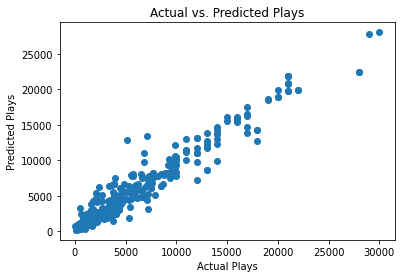

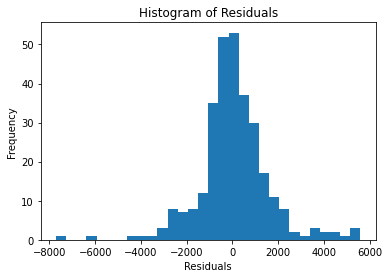

In [15]:
# Scatter plot of actual vs. predicted plays
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Plays')
plt.xlabel('Actual Plays')
plt.ylabel('Predicted Plays')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()